# STSA Data Visualization With Python

<img width="700" src="https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/doc/source/images/Harvey.png">

NASA TERRA MODIS INFRARED IMAGE OF HARVEY AT 0419 UTC 26 AUGUST 2017 JUST AFTER LANDFALL AS A
CATEGORY 4 HURRICANE IN TEXAS. IMAGE COURTESY OF UW/CIMSS.

## A Jupyter Notebook used to visualize data from the Houston Flood of 2017 running on IBM Watson Studio

### [Jupyter Notebook]( www.jupyter.org)
An open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.

### [IBM Watson Studio](https://www.ibm.com/cloud/watson-studio)
Build and train AI & machine learning models, prepare and analyze data – all in a flexible, hybrid cloud environmentIBM Watson Studio provides tools for data scientists, application developers and subject matter experts to collaboratively and easily work with data to build and train models at scale. It gives you the flexibility to build models where your data resides and deploy anywhere in a hybrid environment so you can operationalize data science faster.

### [Python](https://www.python.org/)
Python is a programming language that lets you work quickly
and integrate systems more effectively.


## Contents
[1.0 Install dependencies and import packages](#install)  
[2.0 Obtain and curate data](#obtain)  
[3.0 Create Pixie App](#create)  
[4.0 Use Folium for mapping](#folium)  
[5.0 Explore more tools](#more)  

<a id="install"></a>
## 1.0 Install dependencies and import packages

### 1.1 Install pixiedust

We install the prerequisites using the `!pip install` syntax here.
In some cases, running pip install from a notebook may require a one-time kernel restart. Check the output for messages.
If instructed to restart the kernel, from the notebook toolbar menu: • Go to > Kernel > Restart • Click Restart in the confirmation dialog
> Note: The status of the kernel briefly flashes near the upper right corner, alerting when it is Not Connected, Restarting, Ready, etc. 

In [1]:
!pip install --upgrade pixiedust

Waiting for a Spark session to start...
Spark Initialization Done! ApplicationId = app-20190621073543-0000
KERNEL_ID = bf6759c0-8359-4932-84db-c9df0fc8e37c
    100% |################################| 204kB 2.2MB/s eta 0:00:01
    100% |################################| 798kB 1.8MB/s eta 0:00:01
    100% |################################| 5.7MB 1.3MB/s eta 0:00:01                | 1.9MB 40.4MB/s eta 0:00:01
    100% |################################| 92kB 2.3MB/s eta 0:00:01
    100% |################################| 61kB 1.4MB/s eta 0:00:01
    100% |################################| 583kB 3.3MB/s eta 0:00:01
    100% |################################| 163kB 2.6MB/s eta 0:00:01
    100% |################################| 153kB 2.6MB/s eta 0:00:01
    100% |################################| 61kB 1.7MB/s eta 0:00:01
    100% |################################| 143kB 2.8MB/s eta 0:00:01
  Stored in directory: /home/spark/shared/.cache/pip/wheels/25/fa/a5/09c1e8f4c91b34c5f7f4ac6e41be81dd06

### 1.2 Import the packages
Numpy is a package for scientific computing in Python.  
Pandas helps with data structures.  
[Pixiedust](https://pixiedust.github.io/pixiedust/) is a Python helper library for Jupyter notebooks.

In [3]:
import pandas as pd

import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table SPARK_PACKAGES created successfully
Table USER_PREFERENCES created successfully
Table service_connections created successfully


<a id="obtain"></a>
## 2.0 Obtain and curate data

In order to do data science, or data engineering, we'll need some data.
So, what problem are we trying to solve?

### Where in Houston does flooding occur, and which specific adresses are vulnerable?

### 2.1 Search for data
We are interested in the flooding in Houston on August, 2017, as a result of Hurricane Harvey.
Using a search engine, we can try `houston flood 2017 data`.  
That gave many results, mostly news stories. But there are some promising sites, many from US government agencies:  
* https://www.weather.gov
* https://txpub.usgs.gov/floodwatch/#page-top
* https://water.weather.gov/ahps2/index.php?wfo=hgx
* https://www.nhc.noaa.gov/data/tcr/AL092017_Harvey.pdf
* https://stn.wim.usgs.gov/STNDataPortal/#
* https://streamstats.usgs.gov/ss/

That's just the beginning, but hopefully it can lead to some data we can use.

### 2.2 Download and examine data
We'll look at some data from stream gauges in Houston, gathering historical data from the dates 8/23/2017 - 8/31/2017.  
I've grabbed the data for one stream gauge in the Houston Beltway area, Hunting Bayou, from the [waterdata.usgs.gov](https://waterdata.usgs.gov/nwis/nwismap/?site_no=08075763&agency_cd=USGS) site.

In [4]:
!wget https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/HuntingBayou.csv


--2019-06-21 07:45:30--  https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/HuntingBayou.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43511 (42K) [text/plain]
Saving to: 'HuntingBayou.csv'

HuntingBayou.csv    100%[===================>]  42.49K  --.-KB/s    in 0s      

2019-06-21 07:45:31 (137 MB/s) - 'HuntingBayou.csv' saved [43511/43511]



#### 2.3 First, let's look at the header to the file (which I've peeked at in an editor). This gives us some info on the contents:

In [5]:
! head -n 35 HuntingBayou.csv

# ---------------------------------- WARNING ----------------------------------------
# Some of the data that you have obtained from this U.S. Geological Survey database
# may not have received Director's approval. Any such data values are qualified
# as provisional and are subject to revision. Provisional data are released on the
# condition that neither the USGS nor the United States Government may be held liable
# for any damages resulting from its use.
#
# Additional info: https://help.waterdata.usgs.gov/policies/provisional-data-statement
#
# File-format description:  https://help.waterdata.usgs.gov/faq/about-tab-delimited-output
# Automated-retrieval info: https://help.waterdata.usgs.gov/faq/automated-retrievals
#
# Contact:   gs-w_support_nwisweb@usgs.gov
# retrieved: 2019-02-27 16:27:28 EST       (nadww01)
#
# Data for the following 1 site(s) are contained in this file
#    USGS 08075770 Hunting Bayou at IH 610, Houston, TX
# ----------------------------------------------------

#### 2.4 Look at the pandas dataframe 
I see from the header that I need to skip the first 29 rows (rows 0-28), that the data is tab separated, and the header begins on the 30th line (line 29).

In [6]:
df = pd.read_csv('HuntingBayou.csv',sep='\t',skiprows=(0-28),header=(29))

In [7]:
df.head()

,agency_cd,site_no,datetime,tz_cd,140488_00060,140488_00060_cd,140489_00065,140489_00065_cd
0,5s,15s,20d,6s,14n,10s,14n,10s
1,USGS,08075770,2017-08-23 00:00,CDT,7.92,A,17.23,A
2,USGS,08075770,2017-08-23 00:15,CDT,7.92,A,17.23,A
3,USGS,08075770,2017-08-23 00:30,CDT,7.92,A,17.23,A
4,USGS,08075770,2017-08-23 00:45,CDT,7.92,A,17.23,A


##### 2.5 Do some data frame cleanup
What's with the extra fields on line 0? Let's delete that line.

In [8]:
df = df.drop(0)

We can rename those obscure column names, to give them a name that represents the data:

In [9]:
df.rename(columns={'140488_00060': 'Discharge(cfs)', '140489_00065': 'GuageHeight(feet)'}, inplace=True)

Let's replace the `site_no` with a `site_name` for `HuntingBayou.csv`:

In [10]:
df.rename(columns={'site_no': 'site_name'}, inplace=True)
df['site_name'].replace("08075770", "HuntingBayou.csv", inplace=True)

We don't care about the first `agency_cd` column, which is `USGS`, so let's drop it. The same goes for the `140488_00060_cd`, `140489_00065_cd`, and `tz_cd` columns. The `axis=1` denotes that this is a column.

In [15]:
df.drop(['agency_cd', '140488_00060_cd', '140489_00065_cd', 'tz_cd'], axis=1, inplace=True)

Our `Discharge` and `GuageHeight` data are strings, but we need them to be floats. We'll convert them

In [16]:
df['GuageHeight(feet)'] = df['GuageHeight(feet)'].convert_objects(convert_numeric=True)
df['Discharge(cfs)'] = df['Discharge(cfs)'].convert_objects(convert_numeric=True)

/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/opt/ibm/conda/miniconda36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Our datetime has the year 2017 for all fields, but our graphs will be cleaner if we skip it

In [17]:
df['datetime'] = df['datetime'].map(lambda x: x.lstrip('2017-'))

And finally, we can get the latitude and longitude for this stream gauge at Hunting Bayou, so let's add a couple columnns with that data, to allow this to show up on a map.
We'll need that lat/long in decimal, so [find a tool](https://www.latlong.net/degrees-minutes-seconds-to-decimal-degrees) for that as well.

In [18]:
df['latitude']='29.808611'
df['longitude']='-95.313056'

Now we can see our results.

In [19]:
df.head()

,site_name,datetime,Discharge(cfs),GuageHeight(feet),latitude,longitude
1,HuntingBayou.csv,8-23 00:00,7.92,17.23,29.808611,-95.313056
2,HuntingBayou.csv,8-23 00:15,7.92,17.23,29.808611,-95.313056
3,HuntingBayou.csv,8-23 00:30,7.92,17.23,29.808611,-95.313056
4,HuntingBayou.csv,8-23 00:45,7.92,17.23,29.808611,-95.313056
5,HuntingBayou.csv,8-23 01:00,7.92,17.23,29.808611,-95.313056


### 2.6 Use Matplotlib to visualize data
[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shells, the Jupyter notebook, web application servers, and four graphical user interface toolkits.

We'll use [the `inline` backend](https://ipython.readthedocs.io/en/stable/interactive/plotting.html) to plot the graph in the notebook.

In [20]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

#### Plot the Discharge against time

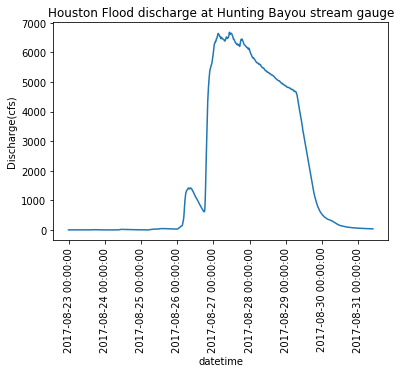

In [21]:
# setup line graph
plt.plot(df['datetime'],df['Discharge(cfs)'])
plt.title('Houston Flood discharge at Hunting Bayou stream gauge')
plt.ylabel('Discharge(cfs)')
plt.xlabel('datetime')
ax = plt.gca()
df.set_index('datetime')

# Only label every 20th value
ticks_to_use = df.index[::100]
# label ticks per day
dr = pd.date_range('2017-08-23', periods=9, freq='D')

## Now set the ticks and labels
ax.set_xticks(ticks_to_use)
ax.set_xticklabels(dr)
plt.xticks(rotation='vertical')

plt.show()



#### Plot the Gauge Height against time

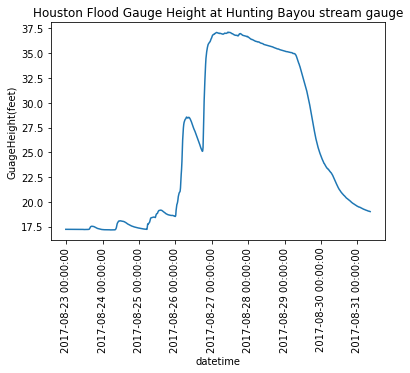

In [22]:
# setup line graph
plt.plot(df['datetime'],df['GuageHeight(feet)'])
plt.title('Houston Flood Gauge Height at Hunting Bayou stream gauge')
plt.ylabel('GuageHeight(feet)')
plt.xlabel('datetime')
ax = plt.gca()
df.set_index('datetime')

# Only label every 20th value
ticks_to_use = df.index[::100]
# label ticks per day
dr = pd.date_range('2017-08-23', periods=9, freq='D')

## Now set the ticks and labels
ax.set_xticks(ticks_to_use)
ax.set_xticklabels(dr)
plt.xticks(rotation='vertical')

plt.show()

Plot the stream Gauge Height against time

### 2.7 Use pixiedust `display()` to  explore the schema and browse the data                      

With ther pixiedust helper library, we can display charts and graphs more easily, with the one-line `display()` method.
  
#### 2.7.1 Select _DataFrame Table_ icon in the display widget to see the data in tabular form

<img width="500" src="https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/doc/source/images/selectDataFrameTableIcon.png">

#### 2.7.2 Select the chart icon to pull down and choose `line chart`. Click the `Options` button, and then for `Keys` drag and drop `datetime` and for `Values` drag and drop `Discharge`. This will display the water discharge at this stream gauge in cubic feet per second.

<img width="500" src="https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/doc/source/images/selectLineChart.png">

<img width="500" src="https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/doc/source/images/chooseDatetimeDischarge.png">


#### 2.7.4  Click the `Options` button, and then for `Keys` drag and drop `datetime` and for `Values` drag and drop `Gauge_Height`. This will display the height of the water at this stream gauge, in feet.


In [23]:
hunting = df
display(hunting)

### 2.8 Gather data for Max stream flows
#### We have already:
* Found data we can use
* Cleaned the data
* Displayed the data

Next, let's aggregate stream Gauge Maximums for `Gauge Height` and `Discharge` so that we can put them on a map.
This is done offline, manually using a text editor after downloading from various stream gauges, and then put into a single file.

In [25]:
!wget https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/maxFlood.csv


--2019-06-21 07:54:27--  https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/maxFlood.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 291 [text/plain]
Saving to: 'maxFlood.csv'

maxFlood.csv        100%[===================>]     291  --.-KB/s    in 0s      

2019-06-21 07:54:27 (30.5 MB/s) - 'maxFlood.csv' saved [291/291]



In [26]:
maxFlood = pd.read_csv('maxFlood.csv')

In [27]:
maxFlood

,site_name,datetime,Discharge,Gage_Height,latitude,longitude
0,HuntingBayou,8-27 7:30,6640,37.10,29.808611,-95.313056
1,WhiteoakBayou,8-27 5:30,30700,39.54,29.775000,-95.396944
2,BraysBayou,8-27 23:00,33200,45.08,29.696944,-95.411944
3,WhiteoakBayouMainSt,8-27 14:00,1,38.09,29.766389,-95.358333


In [28]:
display(maxFlood)

<a id="create"></a>
## 3.0 Create Pixie App

### Building the PixieApp Dashboard

#### What you'll need:
- Mapbox token: A Mapbox token is rquired for the notebook. To get your own visit [Mapbox](https://www.mapbox.com/)
- Mapbox layers Documentation: [circle](https://www.mapbox.com/mapbox-gl-js/style-spec/#layers-circle), [fill](https://www.mapbox.com/mapbox-gl-js/style-spec/#layers-fill), [symbols](https://www.mapbox.com/mapbox-gl-js/style-spec/#layers-symbol)
- Mapbox Maki Icons: [https://www.mapbox.com/maki-icons](https://www.mapbox.com/maki-icons)
- Browse the data from [Huricane Harvey data archives](https://www.dropbox.com/sh/5757a3ujflzdwxo/AAAFD97LMXCRe0YW1HMJDvQ-a?dl=0) to get the GeoJSON url
- Some understanding of [Jinja2 template](http://jinja.pocoo.org/docs/dev/templates)
- A Quick read of [PixieApp documentation](https://pixiedust.github.io/pixiedust/pixieapps.html)

### FAQ about the code below:
- How do I get the pixiedust options in `self.mapJSONOptions`?
> - Call `display()` on a new cell  
> - Graphically select the options for your chart  
> - Select "View"/"Cell Toolbar"/"Edit Metadata" menu  
> - Click on the “Edit Metadata” button and copy the pixiedust metadata  
- What's the `self.setLayers` call for?
> This is a method from the MapboxBase class used to specify the custom layer definitions array.  
> The fields are:  
>  - name: Layer name  
>  - url: geojson url to download the data from
>  - type: (optional) style type e.g Symbol. If not defined, then default value will be infered from geojson geometry
>  - paint: (optional) paint style, see appropriate documentation e.g. [circle](https://www.mapbox.com/mapbox-gl-js/style-spec/#layers-circle)  
>  - layout: (optional) layout style, see appropriate documentation e.g. [fill](https://www.mapbox.com/mapbox-gl-js/style-spec/#layers-fill)
- How do I find new layer data to add?
> The data layers use geojson format. If you have a `.csv` file, you can use a [csv to geojson converter](https://csv.togeojson.com/) to format correctly.
- What does the `mainScreen` method do?
> This is a PixieApp View associated with the default route. See [PixieApp documentation](https://pixiedust.github.io/pixiedust/pixieapps.html) for more information.
- What's the {{...}} notation in the mainScreen markup for?
> This is a Jinja2 template notation to call server side Python code. See [Jinja2 template](http://jinja.pocoo.org/docs/dev/templates) for more info
- How to turn CSV (comma separated values) into geojson?
> There's [an app](https://csv.togeojson.com/) for that!

In [ ]:
!wget https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/streamGauges.geojson


In [29]:
from pixiedust.display.app import *
from pixiedust.apps.mapboxBase import MapboxBase

@PixieApp
class HoustonDashboard(MapboxBase):
    def setup(self):
        self.mapJSONOptions = {
      "colorrampname": "Green to Purple",
      "coloropacity": "100",
      "handlerId": "mapView",
      "kind": "simple",
      "mapboxtoken": "",
      "keyFields": "latitude,longitude",
      "valueFields": "Gage_Height(feet),Discharge(cfs),date,time"
    }
        

        self.setLayers([
        {
            "name": "Houston Flooded Streets",
            "url": "https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/houston.geojson",
            "type": "LineString"
        },
        {
            "name": "Random fictional homes",
            "url": "https://raw.githubusercontent.com/IBM/visualize-data-with-python/master/data/HoustonFloodedZips250.geojson",
            "circle-color": "rgb(0, 255, 0)"
        }
        ])
    def formatOptions(self,options):
        return ';'.join(["{}={}".format(key,value) for (key, value) in iteritems(options)])

    @route()
    def mainScreen(self):
        return """
<div class="well">
    <center><span style="font-size:x-large">Analyzing Houston Flood data with PixieDust</span></center>
</div>
<div class="row">
    <div class="form-group col-sm-2" style="padding-right:10px;">
        <div><strong>Layers</strong></div>
        {% for layer in this.layers %}
        <div class="rendererOpt checkbox checkbox-primary">
            <input type="checkbox" pd_refresh="map{{prefix}}" pd_script="self.toggleLayer({{loop.index0}})">
            <label>{{layer["name"]}}</label>
        </div>
        {%endfor%}
    </div>
    <div class="form-group col-sm-10">
        <div id="map{{prefix}}" pd_entity pd_options="{{this.formatOptions(this.mapJSONOptions)}}"/>
    </div>
</div>
"""

HoustonDashboard().run(maxFlood,runInDialog="false")


<a id="folium"></a>
## 4.0 Use Folium for mapping

Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building.

From the official Folium documentation page:

> Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it in on a Leaflet map via Folium.

> Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing Vincent/Vega visualizations as markers on the map.

> The library has a number of built-in tilesets from OpenStreetMap, Mapbox, and Stamen, and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

In [30]:
!pip install folium==0.5.0


    100% |################################| 81kB 2.0MB/s eta 0:00:01
    100% |################################| 133kB 2.4MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/51/bd/23c926cd341ea6b7dd0b2a00aba99ae0f828be89d72b2190f27c11d4b7fb/requests-2.22.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe7226e7450af7a6545bfc474c9/idna-2.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/69/1b/b853c7a9d4f6a6d00749e94eb6f3a041e342a885b87340b79c1ef73e3a78/certifi-2019.6.16-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e6/60/247f23a7121ae632d

### 4.1 Create map with Folium

Generating the world map is straigtforward in **Folium**. You simply create a **Folium** *Map* object and then you display it.  
What is attactive about **Folium** maps is that they are interactive, so you can zoom into any region of interest despite the initial zoom level. 

You can customize this default definition of the world map by specifying the centre of your map and the intial zoom level. 

All locations on a map are defined by their respective *Latitude* and *Longitude* values.  
So you can create a map and pass in a center of *Latitude* and *Longitude* values of **[0, 0]**. 

For a defined center, you can also define the intial zoom level into that location when the map is rendered.  
**The higher the zoom level the more the map is zoomed into the center**.

In [31]:
import folium

# define the world map centered around Canada with a higher zoom level
houston_map = folium.Map(location=[29.808611, -95.313056], zoom_start=8)

# display world map
houston_map

### 4.2 Change Folium tiles

One feature of Folium is that you can create different map styles.  
Test some changes to the map instantiation above by using:

`world_map = folium.Map(location=[29.808611, -95.313056], zoom_start=8, tiles='Stamen Terrain')`  
*OR*  
`world_map = folium.Map(location=[29.808611, -95.313056], zoom_start=8, tiles='Stamen Toner')`   
*OR*  
`world_map = folium.Map(location=[29.808611, -95.313056], zoom_start=8, tiles='Mapbox Bright')`  


### 4.3 Add feature group
We can superimpose data from the 2017 Houston flood from stream gauges onto our Folium map

In [32]:
# instantiate a feature group for the incidents in the dataframe
gauges = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(maxFlood.latitude, maxFlood.longitude):
    gauges.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
houston_map.add_child(gauges)

### 4.4 Add text and lat/long
You can also add some pop-up text that would get displayed when you hover over a marker. Let's make each marker display the stream gauge information.
Also, use `folium.LatLngPopup()` so that you can get latitude and logitude info when you click on the map

In [33]:
# instantiate a feature group for the stream gauges in the dataframe
gauges = folium.map.FeatureGroup()

# loop through the stream gauges and add each to the gauges feature group
for lat, lng, in zip(maxFlood.latitude, maxFlood.longitude):
    gauges.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add site_name pop-up text to each marker on the map
latitudes = list(maxFlood.latitude)
longitudes = list( maxFlood.longitude)
label = list(maxFlood.site_name)

for lat, lng, label in zip(latitudes, longitudes, label):
    folium.Marker([lat, lng], popup=label).add_to(houston_map)    
    
# add gauges to map
houston_map.add_child(gauges)

# add clickable lat and long info
houston_map.add_child(folium.LatLngPopup())

### 4.5 Add ability to drop markers on-the-fly
Use the `folium.ClickForMarker()` method to allow you to click on a spot and drop a marker for `My House`.

#### Exercise: See if you can find your `Assigned House` and drop a marker at that latitude and longitude location


In [34]:
houston_map.add_child(folium.ClickForMarker(popup='My House'))

<a id="more"></a>
## 5.0 Explore more tools

Investigate some othe Python libraries for data visualization:

* [seaborn: statistical data visualization](https://seaborn.pydata.org/)
* [bokeh: interactive Web Plotting for Python](https://bokeh.pydata.org/en/latest/)
* [plotly: python Open Source Graphing Library](https://plot.ly/python/)
* [ggplot: plotting system for Python based on R](http://ggplot.yhathq.com/docs/index.html)
* [pygal: sexy python charting](http://pygal.org/en/stable/)